# Analyzing high band gap and thin thickness silicon

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Load the data at radiative limit

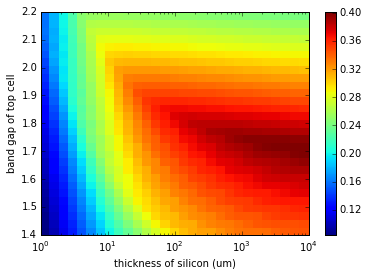

In [23]:
data=np.load("bg_vs_t_qe_opt.npz")
eta_array_rad_lim=data["eta"]
top_cell_gap=data["mbg"]
si_layer=data["tbg"]
#fig = plt.figure(figsize=(2.5, 2.5*3.5/3.75), tight_layout=True)
fig=plt.figure()
ax = fig.add_subplot(111)


cax=ax.pcolormesh(si_layer,top_cell_gap,eta_array_rad_lim)
ax.set_xscale("log")
ax.set_ylabel("band gap of top cell")
ax.set_xlabel("thickness of silicon (um)")
ax.set_ylim([np.min(top_cell_gap),np.max(top_cell_gap)])
ax.set_xlim([np.min(si_layer),np.max(si_layer)])
fig.colorbar(cax)

plt.savefig("rad_limit.pdf")
plt.show()

Load the data with top cell (ERE=1E-4), bottom cell ERE=1E-3

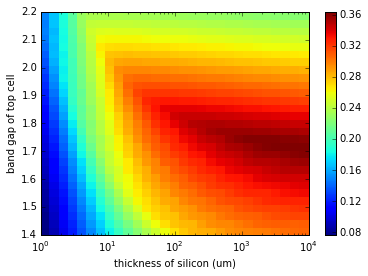

In [24]:
data=np.load("bg_vs_t_qe_opt_1e-3.npz")
eta_array_low_etar=data["eta"]
top_cell_gap=data["mbg"]
si_layer=data["tbg"]
#fig = plt.figure(figsize=(2.5, 2.5*3.5/3.75), tight_layout=True)
fig=plt.figure()
ax = fig.add_subplot(111)


cax=ax.pcolormesh(si_layer,top_cell_gap,eta_array_low_etar)
ax.set_xscale("log")
ax.set_ylabel("band gap of top cell")
ax.set_xlabel("thickness of silicon (um)")
ax.set_ylim([np.min(top_cell_gap),np.max(top_cell_gap)])
ax.set_xlim([np.min(si_layer),np.max(si_layer)])
fig.colorbar(cax)

plt.show()

Load the data with top cell (ERE=1E-7), bottom cell ERE=1

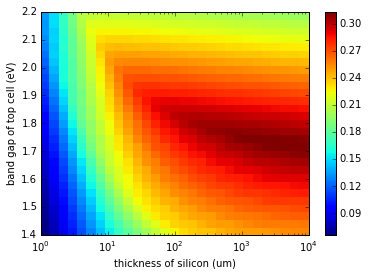

In [25]:
data=np.load("bg_vs_t_qe_opt_1e-7.npz")
eta_array_vlow_etar=data["eta"]
top_cell_gap=data["mbg"]
si_layer=data["tbg"]
#fig = plt.figure(figsize=(2.5, 2.5*3.5/3.75), tight_layout=True)
fig=plt.figure()
ax = fig.add_subplot(111)


cax=ax.pcolormesh(si_layer,top_cell_gap,eta_array_vlow_etar)
ax.set_xscale("log")
ax.set_ylabel("band gap of top cell (eV)")
ax.set_xlabel("thickness of silicon (um)")
ax.set_ylim([np.min(top_cell_gap),np.max(top_cell_gap)])
ax.set_xlim([np.min(si_layer),np.max(si_layer)])
fig.colorbar(cax)
plt.savefig("low_rad_eta.pdf")
plt.show()

In [26]:
def print_max(eta_array,x,y):
    max_j=np.argmax(np.max(eta_array, axis=0))
    max_i=np.argmax(np.max(eta_array, axis=1))

    assert eta_array[max_i,max_j]==np.max(eta_array)

    print("optimal band gap of top cell:%s"%y[max_i])
    print("thickness of silicon (um): %s"%x[max_j])
    print("max eta: %s"%eta_array.max())

In [27]:
print_max(eta_array_rad_lim,si_layer,top_cell_gap)

optimal band gap of top cell:1.67586206897
thickness of silicon (um): 10000.0
max eta: 0.401842164958


In [28]:
print_max(eta_array_low_etar,si_layer,top_cell_gap)

optimal band gap of top cell:1.70344827586
thickness of silicon (um): 3856.62042116
max eta: 0.363770344412


In [29]:
print_max(eta_array_vlow_etar,si_layer,top_cell_gap)

optimal band gap of top cell:1.70344827586
thickness of silicon (um): 3856.62042116
max eta: 0.313543182445


The result shifts a bit to higher band gap and lower thickness

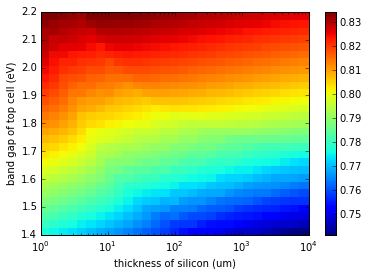

In [30]:
plt.pcolormesh(si_layer,top_cell_gap,eta_array_vlow_etar/eta_array_rad_lim)
plt.colorbar()
plt.ylim([top_cell_gap.min(),top_cell_gap.max()])
plt.xscale("log")
plt.xlabel("thickness of silicon (um)")
plt.ylabel("band gap of top cell (eV)")
plt.savefig("ratio.pdf")

This result confirms the guess. With low ERE, large band gap and thin-silicon has less reduction in efficiency. However, the peak efficiency of is still near perfect current matching condition ~1.7eV/thick silicon. From this result, we can only conclude that high band-gap top cell and thin-thickness bottom cell is less sensitive to the drop of ERE, but they are not optimal design, unless we have other considerations of materials.